<a href="https://colab.research.google.com/github/gianpDomiziani/TinyML/blob/main/tinyML0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Initial weights
W = 10.0
B = 10.0

predictions = []
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    predictions.append(model.predict(xs))
callbacks = MyCallBack()

# define my customer Neural Network.
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.conv = tf.keras.layers.Conv2D(32, 3, activation='relu')
    self.flatter = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(128, activation='relu')
    self.dense2 = tf.keras.layers.Dense(10)
  
  # run the model by passing as input the x data.
  def call(self, x):
    x = self.conv(x)
    x = self.flatter(x)
    x = self.dense1(x)
    x = self.dense2(x)
    return x

# define a simple linear model
class SimpleLinearModel():

  def __init__(self):
    self.w = tf.Variable(W)
    self.b = tf.Variable(B)
  
  def __call__(self, x):
    return self.w * x + self.b

In [5]:
# define the learning process (trainining)

def loss(preds, targets):
  return tf.reduce_mean(tf.square(preds - targets))

def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as g:
    current_loss = loss(model(inputs), outputs)
  # get the partial derivates of the loss with respect the w and b.
  dw, db = g.gradient(current_loss, [model.w, model.b])
  # update the weights using the gradient descent's rule
  model.w.assign_sub(dw*learning_rate)
  model.b.assign_sub(db*learning_rate)
  return current_loss

In [6]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.09
# instance the model
model = SimpleLinearModel()

losses = []
ls_w, ls_b = [], []
for e in range(50):
  ls_w.append(model.w.numpy())
  ls_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, LEARNING_RATE)
  losses.append(current_loss)
  print("Epoch: %2d - W: %1.2f - B: %1.2f - Loss: %2.5f" % 
        (e, ls_w[-1], ls_b[-1], current_loss))
 


Epoch:  0 - W: 10.00 - B: 10.00 - Loss: 715.66669
Epoch:  1 - W: -0.41 - B: 5.86 - Loss: 27.47032
Epoch:  2 - W: -0.02 - B: 5.28 - Loss: 22.43888
Epoch:  3 - W: 0.16 - B: 4.69 - Loss: 18.46284
Epoch:  4 - W: 0.33 - B: 4.16 - Loss: 15.19137
Epoch:  5 - W: 0.49 - B: 3.68 - Loss: 12.49958
Epoch:  6 - W: 0.63 - B: 3.25 - Loss: 10.28476
Epoch:  7 - W: 0.76 - B: 2.85 - Loss: 8.46238
Epoch:  8 - W: 0.87 - B: 2.50 - Loss: 6.96291
Epoch:  9 - W: 0.98 - B: 2.17 - Loss: 5.72914
Epoch: 10 - W: 1.07 - B: 1.88 - Loss: 4.71398
Epoch: 11 - W: 1.16 - B: 1.61 - Loss: 3.87870
Epoch: 12 - W: 1.24 - B: 1.37 - Loss: 3.19143
Epoch: 13 - W: 1.31 - B: 1.15 - Loss: 2.62593
Epoch: 14 - W: 1.37 - B: 0.95 - Loss: 2.16064
Epoch: 15 - W: 1.43 - B: 0.77 - Loss: 1.77779
Epoch: 16 - W: 1.48 - B: 0.60 - Loss: 1.46278
Epoch: 17 - W: 1.53 - B: 0.45 - Loss: 1.20359
Epoch: 18 - W: 1.57 - B: 0.32 - Loss: 0.99032
Epoch: 19 - W: 1.61 - B: 0.20 - Loss: 0.81484
Epoch: 20 - W: 1.65 - B: 0.08 - Loss: 0.67046
Epoch: 21 - W: 1.68 - 

## Plot our trained values over time

[]

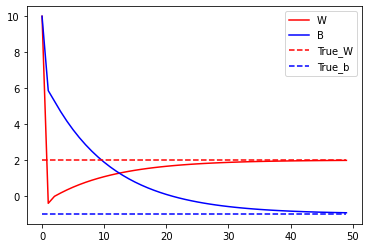

In [7]:
TRUE_w = 2.0
TRUE_b = -1.0
epochs = range(50)
fig, ax = plt.subplots()
ax.plot(epochs, ls_w, 'r', epochs, ls_b, 'b')
ax.plot([TRUE_w]*len(epochs), 'r--', [TRUE_b]*len(epochs), 'b--')
ax.legend(['W', 'B', 'True_W', 'True_b'])
plt.plot()

In [10]:
my_layer1 = tf.keras.layers.Dense(units=2, input_shape=[1])
my_layer2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([my_layer1, my_layer2])
model.compile(optimizer='sgd', loss='mse')

xs = np.array(xs, dtype=float)
ys = np.array(ys, dtype=float)

model.fit(xs, ys, epochs=500)



Epoch 1/500
1/1 [==============================] - 0s 392ms/step - loss: 4.1018
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 2.7907
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 1.8748
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 1.2989
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 0.9661
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.7820
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6780
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6136
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5680
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5313
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4991
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4697
Epoch 13/500
1/1 [==============================] - 0s 7ms/

In [29]:
layer1_w1 = my_layer1.get_weights()[0][0][0]
layer1_w2 = my_layer1.get_weights()[0][0][1]
layer1_b1 = my_layer1.get_weights()[1][0]
layer1_b2 = my_layer1.get_weights()[1][1]

layer2_w1 = my_layer2.get_weights()[0][0]
layer2_w2 = my_layer2.get_weights()[0][1]
layer2_b1 = my_layer2.get_weights()[1][0]

INPUT = np.array(10.0).reshape([1,1])
pred = model.predict(INPUT)

output_neuron1 = layer1_w1*INPUT + layer1_b1
output_neuron2 = layer1_w2*INPUT + layer1_b2

output_neuron3 = layer2_w1*output_neuron1 + layer2_w2*output_neuron2 + layer2_b1
assert round(pred[0][0], 4) == round(output_neuron3[0][0], 4)